This is the second of the two steps in reinterpreting our result in [XENONnT first light DM search](https://arxiv.org/pdf/2409.17868). 

In this notebook, we demonstrate how to quickly derive constraints on new physics by reinterpreting our data with an approximate approach. We have tested the accuracy of this method, and found that it introduces a bias of up to 30% in a conservative direction. This notebook assumes you have completed the first notebook and generated the necessary templates.

# Theory in a nutshell

As we reported in the paper, we used profiled-likelihood-ratio (PLR) as our statistics. Later we use this statistics to define confidence interval of new physics.

$$
q(\sigma) \equiv-2 \ln \frac{\mathcal{L}(\sigma, \hat{\hat{\boldsymbol{\theta}}})}{\mathcal{L}(\hat{\sigma}, \hat{\boldsymbol{\theta}})}
$$

The statistics itself is beyond the scope of this package, and we recommend [the white paper](https://arxiv.org/pdf/2105.00599) as a pedagogical introduction. Here is the likelihood function we reported in paper.

$$
\mathcal{L}(\sigma, \boldsymbol{\theta}) = \mathcal{L}_\mathrm{sr0}(\sigma, \boldsymbol{\theta}) \cdot \mathcal{L}_\mathrm{sr1}(\sigma, \boldsymbol{\theta}) \cdot \mathcal{L}_\mathrm{anc}(\boldsymbol{\theta})
$$

with the DM-nucleon cross section $\sigma$ or the "coupling strength" parameter, and a vector of nuisance parameters $\boldsymbol{\theta}$, including the two important yield model parameters $t_{ly}$ and $t_{qy}$ we explored in the previous notebook.
The likelihoods $\mathcal{L}_\mathrm{sr0}$ and $\mathcal{L}_\mathrm{sr1}$ are each an **extended binned likelihood with 81 bins in 4 analysis dimensions** and they depend on the science data of SR0 and SR1 respectively. Each science run's likelihood term looks like this:


$$
\mathcal{L}_{\text {sr}}(\sigma, \boldsymbol{\theta})= \text{Pois}\left(N \mid \mu_{\mathrm{tot}}(\sigma, \boldsymbol{\theta})\right) \times \prod_{i=1}^N\left[\sum_c \frac{\mu_c(\sigma, \boldsymbol{\theta})}{\mu_{\mathrm{tot}}(\sigma, \boldsymbol{\theta})} \times f_c\left(\vec{x}_i \mid \boldsymbol{\theta}\right)\right]
$$


The index $i$ runs over all $N$ observed events $\vec{x}_i$ in (cS2, S2 Shadow, S1BDT Score, S2BDT Score) coordinate. Meanwhile, $f_c$ is the signal and background templates we obtained from last notebooks.

The term $\mathcal{L}_\mathrm{anc}(\boldsymbol{\theta})$ contains ancillary measurements to Gaussianly constrain nuisance parameters. 

We recommend our [dedicated analysis paper](https://arxiv.org/pdf/2406.13638) for more information on this topic. For hand-on practice, we recommend the [tutorial notebooks of alea](https://github.com/XENONnT/alea/tree/main/notebooks) (the software we use to perform statistical inference in XENON).

# Practice in a nutshell

**Important note:** The following content in this notebook assumes your DM signal rate is proportional to $\sigma$, and there is NO shape change in recoil energy spectrum as you change $\sigma$. In more complicated scenarios, we cannot guarantee the reliability of this tool.

The DM-nucleon cross section can be rewritten into $\sigma=s\cdot\sigma_0$, where $\sigma_0$ is the nominal cross section you defined in the previous notebook that gives you the certain signal rate, and $s$ is a scalar rate multiplier for the DM signal. In practice, we use the methodology introduced above, to determine the confidence interval of $s$.

In [1]:
import numpy as np
from tqdm import tqdm
from scipy.stats import chi2
from light_wimp_data_release import produce_model_config, TEMPLATE_PATH, get_statistical_model

# Just some plotting settings
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = [4, 3]
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = 9
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

XLA_PYTHON_CLIENT_PREALLOCATE is set to false
XLA_PYTHON_CLIENT_ALLOCATOR is set to platform
Cannot find aptext


/opt/anaconda3/envs/light_wimp_data_release/lib/python3.11/site-packages/appletree/__init__.py:51: UserWarning: You are running appletree on CPU, which usually results in low performance.
  warn(warning)


## Example: Customized signal model & customized yield model

This example correspond to the section "Generate templates for arbitrary signal model and yield model" in the previous notebook.

In [2]:
confidence_level = 0.9
signal_source_name = "fermionic"        # The source_name in produce_templates function
signal_folder_name = "fermionic_linear" # The output_folder in produce_templates function
b8_source_name     = "b8"               # This should be None only if you use default yield model
b8_folder_name     = "b8_linear"        # This should be None only if you use default yield model

produce_model_config(
    signal_source_name = signal_source_name,
    signal_folder_name = signal_folder_name,
    b8_source_name     = b8_source_name,
    b8_folder_name     = b8_folder_name
)

# Please remove pdf_cache if you can see any before running this
config_path = f"../light_wimp_data_release/data/{signal_folder_name}_statistical_model.yaml"
model = get_statistical_model(config_path=config_path, confidence_level=confidence_level)

INFO:root:Load fermionic_linear/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/fermionic_linear/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load fermionic_linear/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/fermionic_linear/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load b8_linear/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/b8_linear/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load b8_linear/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHu

Here the `model` is the $\mathcal{L}(s, \boldsymbol{\theta})$ introduced earlier. Below we get the confidence interval on $q(\sigma=0)$. For simplicity, we will not do the full Neyman construction when building confidence intervals, which we used in the paper, but just assume [asymptotic Neyman threshold](https://arxiv.org/pdf/1007.1727v3) for $q(\sigma=0)$. For a comprehensive tutorial on this object and what more you can do with it, please refer to [tutorial notebooks of alea](https://github.com/XENONnT/alea/tree/main/notebooks).

Now we visualize how this model gives you the limit.

In [3]:
# This is the PLR statistics q(s)
plrs = []
# This is the signal multiplier s
signal_multipliers = np.arange(40)/50

# Get the PLR function
for s in tqdm(signal_multipliers):
    # Denominator
    _best_fit, _ll_free = model.fit()
    # Numerator
    _null_fit, _ll_zero = model.fit(wimp_rate_multiplier=s)
    # The PLR statistics under null hypothesis 
    _plr = -2 * (_ll_zero - _ll_free)
    plrs.append(_plr)

100%|██████████| 40/40 [00:14<00:00,  2.72it/s]


Text(0, 0.5, '$q(s)$')

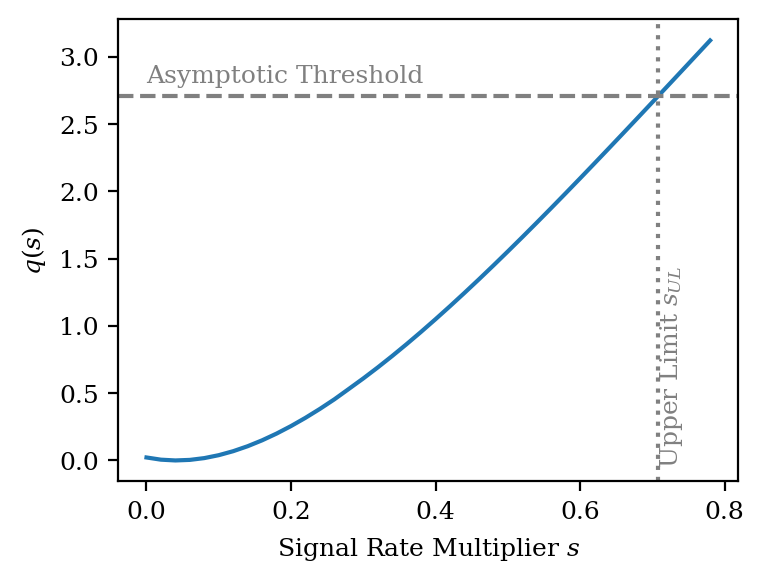

In [4]:
# See this paper to make sense: https://arxiv.org/pdf/1007.1727v3
asymptotic_threshold = chi2(1).isf(1.0 - confidence_level)

# Just use the asymptotic threshold to obtain upper limit on signal rate multiplier
_, upper_limit_s = model.confidence_interval(poi_name="wimp_rate_multiplier") 

plt.plot(signal_multipliers, plrs)
plt.axhline(asymptotic_threshold, ls="--", color="grey")
plt.text(0, asymptotic_threshold+0.1, "Asymptotic Threshold", color="grey")
plt.axvline(upper_limit_s, ls=":", color="grey")
plt.text(upper_limit_s, 0, "Upper Limit $s_{UL}$", color="grey", rotation=90)
plt.xlabel("Signal Rate Multiplier $s$")
plt.ylabel("$q(s)$")

The `upper_limit_s` is the constraint (upper limit) $s_{UL}$ we have on rate multiplier of the specified signal model.

In [5]:
upper_limit_s

0.7077426983481122

Now the constraint on your new physics model is $s_{\mathrm{UL}} \cdot \sigma_0$.

## Example: Customized signal model and default yield model

In [6]:
confidence_level = 0.9
signal_source_name = "fermionic"        # The source_name in produce_templates function
signal_folder_name = "fermionic_ybe"    # The output_folder in produce_templates function
b8_source_name     = None               # This should be None only if you use default yield model
b8_folder_name     = None               # This should be None only if you use default yield model

produce_model_config(
    signal_source_name = signal_source_name,
    signal_folder_name = signal_folder_name,
    b8_source_name     = b8_source_name,
    b8_folder_name     = b8_folder_name
)

# Please remove pdf_cache if you can see any before running this
config_path = f"../light_wimp_data_release/data/{signal_folder_name}_statistical_model.yaml"
model = get_statistical_model(config_path=config_path, confidence_level=confidence_level)

INFO:root:Load fermionic_ybe/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/fermionic_ybe/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load fermionic_ybe/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/fermionic_ybe/template_XENONnT_sr0_fermionic_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load b8/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_wimp_data_release/data/b8/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5
INFO:root:Load b8/template_XENONnT_sr0_b8_cevns_tly_{t_ly:.1f}_tqy_{t_qy:.1f}.h5 successfully from /Users/lanqingyuan/Documents/GitHub/light_wimp_data_release/light_w

In [7]:
# Just use the asymptotic threshold to obtain upper limit on signal rate multiplier
_, upper_limit_s = model.confidence_interval(poi_name="wimp_rate_multiplier")

In [8]:
upper_limit_s

0.269298275954629

The `upper_limit_s` is the constraint (upper limit) $s_{UL}$ we have on rate multiplier of the specified signal model.